In [1]:
import pandas as pd
import pandahouse as ph
import numpy as np
import seaborn as sns
import hashlib
from scipy import stats

In [2]:
connection = { } # DataBase 

#### AA test

In [3]:
q = """

""" # querry 
 

,exp_group,user_id,likes,views,ctr
0,3,115383,11,36,0.305556
1,3,123580,15,92,0.163043
2,2,131473,26,148,0.175676
3,2,23985,12,66,0.181818
4,2,24523,17,120,0.141667


In [ ]:
users_df = ph.read_clickhouse(q, connection=connection) # user extraction for clickhouse

users_df['hash_group'] = users_df.user_id.swifter.apply(ab_split) # spliting groups 

users_df.groupby('hash_group').user_id.nunique().reset_index() # looking for users number in groups

Проведем АА тест 10000 раз с проверкой Т-критерием

/nfs/env/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

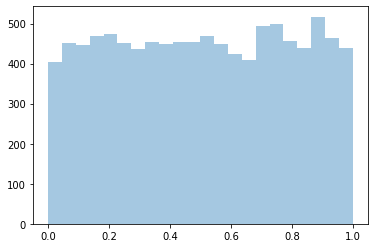

In [4]:
p=[] # repete AA test  10000 times to be sure that spliting is vorrect
for i in range(10000):
    pvalue=stats.ttest_ind(df[df.exp_group == 2].ctr.sample(n=500),
                df[df.exp_group == 3].ctr.sample(n=500),
                equal_var=False).pvalue
    p.append(pvalue)
sns.distplot(p,kde = False)   

In [5]:
miss = sum(map(lambda x : x<= 0.05, p))/len(p)*100
print('pvalue lower then 0.05 in '+str(miss)+'% \n spliting system working correctly')

Количество pvalue ниже значения 0.05 составляет 4.55% 
 делаем вывод что система сплитирования работает
